## Joining Methods (25 points)

In [173]:
#import packages here
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad

#### As was explained during the lectures, engineering design of joints should take into consideration pros and cons of each joining method, applied to the specific case we are trying to explore.
#### Many factors are monitored as design criteria, such as: needed shear strength, necessity for removal to perform inspection and maintenance, lightweight design requirements, possible stress concentrations, desired failure modes, etc.
#### Overall, understanding the joining of reinforced polymers is essential to obtain proper structural integrity and sufficient service life. Therefore, several aspects of joining methods will be considered and analysed in this notebook, specifically regarding bonded joints and thermoplastic composites (TPC) joining.


#### NOTE
#### For the following questions it is essential for you to keep in mind the two main models you will be considering to evaluate peak shear stresses in bonded joints (Klein, B., Gänsicke, T. (2019). Fügetechniken. In: Leichtbau-Konstruktion. Springer Vieweg, Wiesbaden. https://doi.org/10.1007/978-3-658-26846-6_22):
#### Klein model:
 $$\tau(x)  = \frac{\omega \cdot \tau_{m}}{(\beta+2) \cdot (cosh \omega -1)} \cdot [sinh(\omega(1-\frac{x}{l_{u}})) + (\beta + 1) \cdot sinh(\omega \cdot \frac{x}{l_{u}})] $$
$$\omega  =  \sqrt \frac{G_{Kl} \cdot (E1 \cdot t1 + E2 \cdot t2) \cdot l_{u}^{2} }{E1 \cdot t1 \cdot E2 \cdot t2 \cdot d}  $$
$$\beta  =  \sqrt \frac{G_{Kl} \cdot (E2 \cdot t2 - E1 \cdot t1) \cdot l_{u}^{2} }{E1 \cdot t1 \cdot (G_{Kl} \cdot l_{u}^{2} + E2 \cdot t2 \cdot d) }  $$
Where:
$\tau_{m}$ = average shear stess
$E1$, $E2$ = adherends' Young's moduli 
$t1$, $t2$ = adherends' thicknesses
$ l_{u}$ = overlap length
$G_{Kl}$ = adhesive shear modulus
$d$ = adhesive thickness
####  Volkersen model for the adhesive peak shear:
 $$\tau_{Kmax}  = \frac{F_{10}}{b} \cdot \sqrt{\frac{1}{2} \cdot \frac{1}{E \cdot t} \cdot \frac{G_{K}}{t_{K}}}  $$
 Where:
 $F_{10}$ = applied tensile load
 $b$ = overlap length
 $E$ = adherends' Young's modulus
 $t$ =  adherends' thickness
 $G_{K}$ = adhesive shear modulus
 $t_{K}$ = adhesive thickness

In [174]:
### Klein model ###
def tau_klein(x, tau_m, lu, GKl, E1, t1, E2, t2, d):
    omega = np.sqrt(GKl*(E1*t1+E2*t2)*lu**2 / (E1*t1*E2*t2*d))
    beta = np.sqrt(GKl*(E2*t2-E1*t1)*lu**2 / (E1*t1*(GKl*lu**2+E2*t2*d)))
    return omega * tau_m / ((beta+2)*(np.cosh(omega)-1)) * (np.sinh(omega*(1-x/lu)) + (beta+1)*np.sinh(omega*x/lu))

In [175]:
### Volkersen model ###
def tau_volkersen(F10, b, E,t,GK,tK):
    return F10/b * np.sqrt(GK / (2*E*t*tK))

### Question 1 (5 points)

#### Question 1.1: Two carbon fibre reinforced composite parts are to be adhesively bonded, as shown in the figure below. The following information is provided: Adherends' Young's modulus = 70 GPa, adherends' thickness = 2 mm, adherends' width = 20 mm, adhesive shear modulus = 2.0 GPa, adhesive thickness = 0.3 mm, overlap length = 30 mm. The bonded part will be subjected to a tensile load of 50 kN.

#### - In the lecture you learned about the shear-stress distribution of such a joint. Plot the shear stress distribution over the lap joint for several overlap lengths (including at least: 10, 15, 20, 30, and 50 mm) according to the Klein model. Comment on the results.

#### - Then, repeat the exercise using the Volkersen model instead. What are the most notable differences?

![title](lapjoint.png)

Where:
$\tau_{m}$ = average shear stess
$E1$, $E2$ = adherends' Young's moduli 
$t1$, $t2$ = adherends' thicknesses
$ l_{u}$ = overlap length
$G_{Kl}$ = adhesive shear modulus
$d$ = adhesive thickness

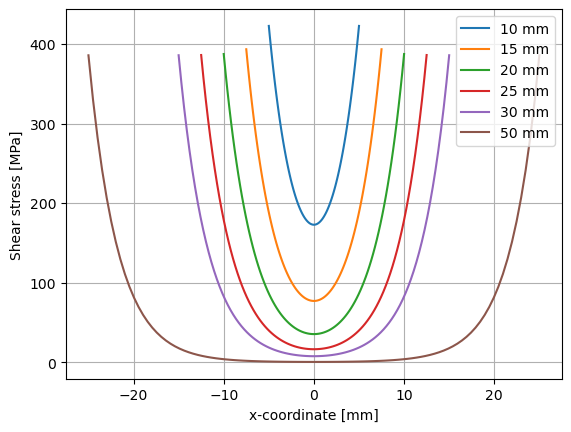

In [176]:
E1, E2, t1, t2, lu, GKl, d, F, w = 70e9, 70e9, 2e-3, 2e-3, 30e-3, 2e9, 0.3e-3, 50e3, 20e-3
overlaps = [10e-3, 15e-3, 20e-3, 25e-3, 30e-3, 50e-3]

for i in overlaps:
    tau_m = F / (w*i)
    x = np.linspace(0,i,100)
    plt.plot((x/1e-3)-i/2*1e3, tau_klein(x, tau_m, i, GKl, E1, t1, E2, t2, d)/1e6, label=f'{i*1e3:.0f} mm')
    

plt.legend()
plt.grid()
plt.xlabel('x-coordinate [mm]')
plt.ylabel('Shear stress [MPa]')
plt.show()


 Where:
 $F_{10}$ = applied tensile load
 $b$ = overlap length
 $E$ = adherends' Young's modulus
 $t$ =  adherends' thickness
 $G_{K}$ = adhesive shear modulus
 $t_{K}$ = adhesive thickness

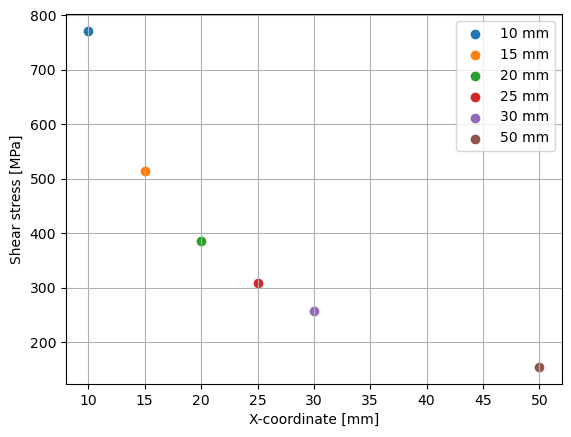

In [177]:
F10, b, E, t, GK, tK = 50e3, 30e-3, 70e9, 2e-3, 2e9, 0.3e-3
for i in overlaps:
    plt.scatter(i/1e-3, tau_volkersen(F10, i, E, t, GK, tK)/1e6, label=f'{i*1e3:.0f} mm')
    
plt.legend()
plt.grid()
plt.xlabel('X-coordinate [mm]')
plt.ylabel('Shear stress [MPa]')
plt.show()

Comments: 



#### Question 1.2: Show how the stress distribution changes when the thickness of the bottom adherend increases to 3mm and 4mm. Create a plot. Why can you expect these shapes of the curves? Answer in the textbox below your plot. Use the Klein model.

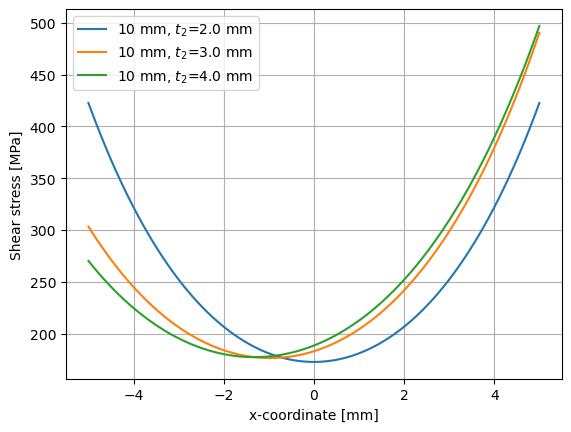

In [178]:
E1, E2, t1, t2, lu, GKl, d, F, w = 70e9, 70e9, 2e-3, 2e-3, 30e-3, 2e9, 0.3e-3, 50e3, 20e-3
overlaps = [10e-3, 15e-3, 20e-3, 30e-3, 50e-3]
overlaps = [10e-3]

for i in overlaps:
    tau_m = F / (w*i)
    for j in [2e-3, 3e-3,4e-3]:
        x = np.linspace(0,i,100)
        plt.plot((x/1e-3)-i/2*1e3, tau_klein(x, tau_m, i, GKl, E1, t1, E2, j, d)/1e6, label=f'{i*1e3:.0f} mm, $t_2$={j*1e3} mm')
    

plt.legend()
plt.grid()
plt.xlabel('x-coordinate [mm]')
plt.ylabel('Shear stress [MPa]')
plt.show()

Answer:



### Question 2 (2 points)

#### In reality, shear stresses are not the only stresses acting on the lap joint. Due to eccentricity, another type of stress occurs which will lower the maximum carrying capacity. Elaborate on this type of stress and why it affects the maximum load that can be carried.

Answer:

### Question 3 (2 points)

#### Explain how step joints and scarf joints help in increasing the maximum carrying load, compared to single lap joints. Do this by globally analyzing the differences between the 3 joint types, and how these differences result in different stresses.

Answer:

### Question 4 (5 points)

#### Question 4.1: The number of steps $n$ in a step joint has an effect on the shear-stress distribution in the bonded part. Write a function that takes the number of steps of the step joint as input, and returns the stress distribution over the entire bond length. Assume the steps are always equally spaced.
#### Show your results by creating a plot below, which shows $\tau$ over the given length of 30mm for different values of $n$. Assume the same material properties as in Question 1 and apply the Klein model (or other analytical models).

#### Question 4.2: What happens when $n$ approaches infinity? Plot this using your code from question 4.1. Is there another type of joint that it would resemble? 

### Question 5 (6 points)

#### Question 5.1: Consider the scarf joint from the image below. Write a function that takes angle $\alpha$ as input and returns the shear- and tensile stresses in the adhesive. Then, use your function to plot the shear- and tensile stresses vs $\alpha$ for $0^{\circ} <\alpha<90 ^{\circ} $

#### The thickness $t$ of the part is 20 mm, the width $b$ is 30 mm. The part is subjected to a tensile force of 10 kN.

![title](scarfjoint.png)

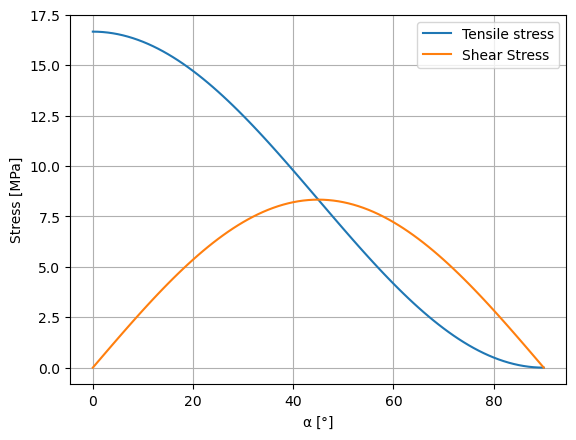

In [179]:
F, b, t = 10e3, 30e-3, 20e-3 #[N]

def area(a,b,t):
    return b * t / np.cos(a*np.pi/180)

def tensile_stress(F,a,b,t):
    return F*np.cos(a*np.pi/180) / area(a,b,t)

def shear_stress(F,a,b,t):
    return F*np.sin(a*np.pi/180) / area(a,b,t)

a = np.arange(0,91,1)
plt.plot(a, tensile_stress(F,a,b,t)/1e6, label='Tensile stress')
plt.plot(a, shear_stress(F,a,b,t)/1e6, label='Shear Stress')
plt.legend()
plt.grid()
plt.xlabel('α [$\degree$]')
plt.ylabel('Stress [MPa]')
plt.show()

#### Question 5.2: At which value for $\alpha$ does the tensile stress peak? At which value for $\alpha$ does the shear stress peak? Explain why this makes sense. Plot a graph, which contains bond-area vs. $\alpha$, to support your explanation.

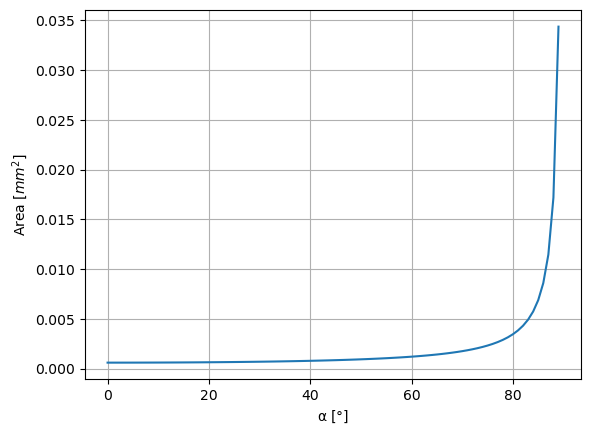

In [184]:
plt.plot(a[0:-1], area(a[0:-1],b,t))
plt.grid()
plt.ylabel('Area [$mm^2$]')
plt.xlabel('α [$\degree$]')
plt.show()

## Joining of thermoplastic composite parts

#### As introduced during lectures, the main advantages of TPC joining via fusion bonding are potential weight reduction, avoidance of drilling induced delaminations and stress concentrations, less labour compared to mechanical fastening. Compared to adhesive bonding, surface treatments are not needed and the process of joining can be sped up dramatically. 
#### The process of fusion bonding entails the use of localized heating in specific areas intended for bonding, followed by a cool down under the application of pressure. After consolidation, this process creates a weld between the surfaces with no visible weld line. To achieve a successful bond, it is necessary to heat the interface above certain temperature thresholds: the glass transition temperature (Tg) for amorphous polymers and the melting temperature (Tm) for semi-crystalline polymers. Additionally, throughout this bonding procedure, it is crucial to ensure that the maximum temperature does not exceed the polymer's degradation point

#### Different phases are encountered during TPC fusion bonding: intimate contact, autohesion and reptation, for which appropriate temperature, time and pressure are needed to properly consolidate the joint.
#### Autohesion, specifically, refers to the diffusion of polymer chains between contacted surfaces. A necessary and critical step in this is assuring intimate contact of the surfaces to bond. The degree of intimate contact is influenced by factors such as applied pressure, current temperature, surface texture, and polymer viscosity.
#### It is obtained through the following, simplified equation (source: Manufacturing Process Models for Thermoplastic Composites, Susan C. Mantell and George S. Springer, Journal of Composite Materials 1992 26:16, 2348-2377):
$$D_{ic} = R_c \cdot [\int_{0}^{t_p} \frac{p}{\mu} \,dt ] ^{0.2} $$
#### Where the parameter $R_c$ is the initial surface roughness of the ply (geometric factor obtained through fitting), time $t$ is expressed in seconds, $p$ is the applied pressure ($Pa$) and $\mu$ (viscosity of the resin, $Pa \cdot s$) which could follow an Arrhenius type relation with temperature: $\mu = A \cdot exp(\frac{B}{T})$ . The parameters A and B represent empirical constants, while T is the applied temperature, expressed in $K$.


### Question 6 (3 points)
#### In this question an APC-2/AS4 (Aromatic Polymer Composite) thermoplastic composite tape, provided by Solvay, has been taken into consideration. More specifically, a standard modulus continuous carbon fiber (12K) and PEEK (polyetheretherketone) impregnated prepreg.
#### The following constants are given for this material: A = 643 Ns/m^2, B = 4367 K. In the following questions we will oversimplify the use of the equation by keeping the surface roughness and pressure constant during the heating process and we will only consider the heating process. Assume $R_c = 0.29$ (or specify a more suitable value derived from assumptions or from a source you found, but in any case specify any assumptions and/or resource you may be using). Use an appropriate timescale for the graphs.
#### Question 6.1: Using the provided information, calculate the degree of intimate contact $D_{ic}$ for three different applied pressures: 0.5 MPa, 1 MPa, 1.5 MPa at a constant temperature T=300°C, applied for 430 s.
#### Question 6.2: Using the provided information, calculate the degree of intimate contact $D_{ic}$ for two different cure cycles: from room temperature up to 250°C, with a heating rate of 1 °C/min and a second one from RT to 350°C with a heating rate of 10 °C/min.
#### Note: Assume $R_c = 0.29$ (or specify a more suitable value derived from assumptions or from a source you found, but in any case specify any assumptions and/or resource you may be using). The maximum reachable value for degree of intimate contact is 1. Use an appropriate timescale for the graphs.

D_ic for pressure of 0.5MPa, at 300C applied for 430.0 sec is 0.8044
D_ic for pressure of 1.0MPa, at 300C applied for 430.0 sec is 0.9240
D_ic for pressure of 1.5MPa, at 300C applied for 430.0 sec is 1.0020


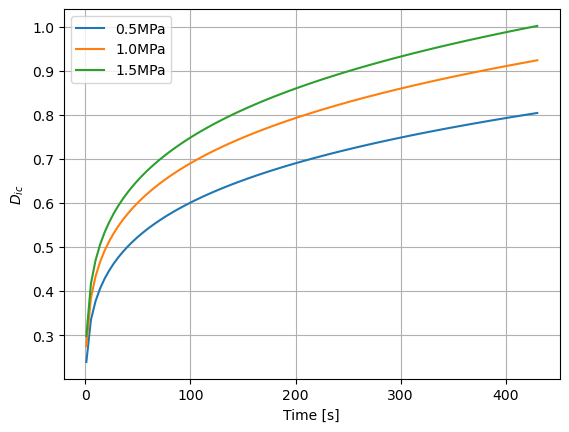

In [165]:
T0 = 273.17 # [K]
A, B, Rc = 643, 4367, 0.29 # [Ns/m^2], [K], [-]
T_start, T_stop, rate = 300+T0, 300+T0, 0 # [K], [K], [K/min]
ps= [0.5e6, 1e6, 1.5e6] # [Pa], [K], [s]
t = 430 # [s]

def temperature(t,T_start,T_stop,rate):
    if rate == 0:
        return T_start
    
    rate_sec = rate/60
    T_delta = T_stop - T_start
    time_to_heat = T_delta / rate_sec
    if t <= time_to_heat:
        return T_start + t * rate_sec
    elif t > time_to_heat:
        return T_stop

def viscosity(T,A,B):
    return A * np.exp(B/T)   

def D_ic(p,t,A,B,Rc,T_start,T_stop,rate):
    return Rc * quad(lambda x: p/viscosity(temperature(t,T_start,T_stop,rate),A,B),0,t)[0] ** 0.2


for p in ps:
    ts = np.linspace(1,t,100)
    D = []
    for t in ts:
        D.append(D_ic(p,t,A,B,Rc,T_start,T_stop,rate))

    print(f'D_ic for pressure of {p/1e6}MPa, at {T_start-T0:.0f}C applied for {t} sec is {D_ic(p,t,A,B,Rc,T_start,T_stop,rate):.4f}')
    plt.plot(ts, D, label=f'{p/1e6}MPa')

plt.legend()
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('$D_{ic}$')
plt.show()

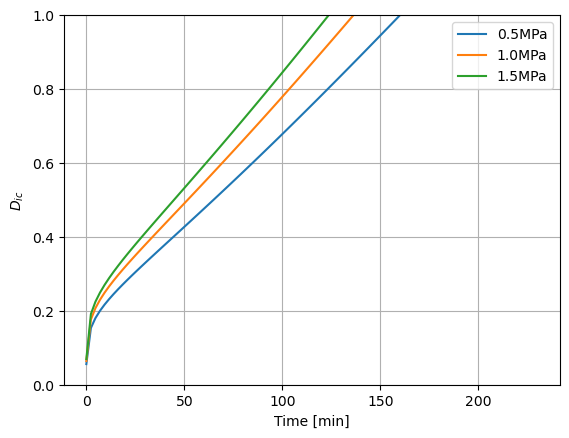

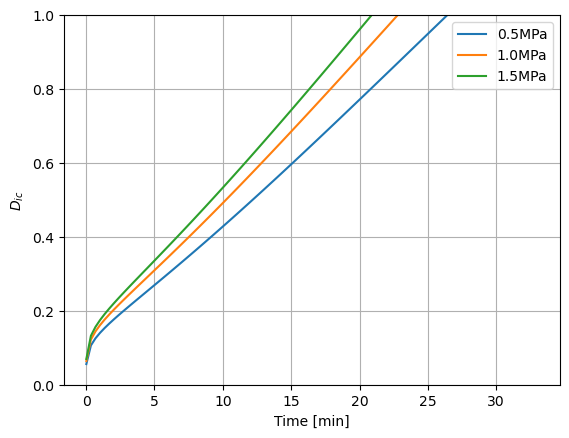

In [187]:
T_start, T_stop, rate = 20+T0, 250+T0, 1 # [K], [K], [K/min]

for p in ps:
    time = (T_stop-T_start)/rate*60
    ts = np.linspace(1,time,100)
    D = []
    for t in ts:
        D.append(D_ic(p,t,A,B,Rc,T_start,T_stop,rate))
    plt.plot(ts/60, D, label=f'{p/1e6}MPa')

plt.legend()
plt.grid()
plt.ylim(0,1)
plt.xlabel('Time [min]')
plt.ylabel('$D_{ic}$')
plt.show()
    
T_start, T_stop, rate = 20+T0, 350+T0, 10 # [K], [K], [K/min]
for p in ps:
    time = (T_stop-T_start)/rate*60
    ts = np.linspace(1,time,100)
    D = []
    for t in ts:
        D.append(D_ic(p,t,A,B,Rc,T_start,T_stop,rate))
    plt.plot(ts/60, D, label=f'{p/1e6}MPa')

plt.legend()
plt.grid()
plt.ylim(0,1)
plt.xlabel('Time [min]')
plt.ylabel('$D_{ic}$')
plt.show()

### Question 7 (2 points)

#### Mechanical properties (such as fracture toughness and strength at failure) of the resulting joint are highly influenced by the parameters applied during consolidation. Reflect on the influence of time, temperature and applied pressure on mechanical properties of co-consolidated parts.

